In [127]:
%pylab --no-import-all inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


### The problem of overfitting
Let's take some data distributed as in the Figure below

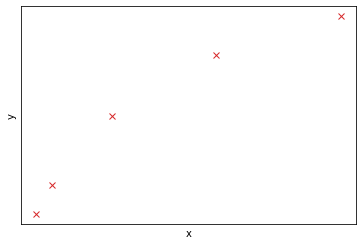

In [99]:
jitter = np.random.rand(5)*0.1
x = np.linspace(0.1, 1, 5)**2+jitter
y = np.log(x)+jitter

fig, ax = plt.subplots()
ax.plot(x, y, marker='x', c='C3', ls='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks([])
ax.set_yticks([]);

Three models are shown in the figure Below in panels A, B, C:

* Panel A: We could use linear regression to model this data but this isn't a good model. Looking at the data it seems clear that as $x$ increases, $y$ hits a plateau, while the model implies that $y$ will linearly grow with $x$. We call this problem **underfitting** or we say that the algorithm has **high bias**. It means that the algorithm has a very strong pre-conception (bias) that $y$ are going to behave very linearly.

* Panel B: We could fit a quadratic function and this works pretty well, it seems that the model is "just right".

* Panel C: At the other extreme we fit a 4th order polynomial to the data, and the curve obtained passes exactly through all data points of the training set but it is sort of wiggly and it doesn't seems to be modelling well $y$ behaviour respect $x$. This problem is called **overfitting** or we say that the algorithm has **high variance**. It means that the alogirhtm deosn't generalize well for all possible $x$ values but it seems to cover perfectly only the training set.

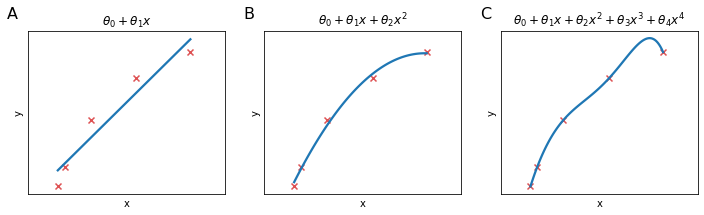

In [105]:
fig, axes = plt.subplots(1,3, figsize=(12, 3), sharey=True)
ax1, ax2, ax3 = axes
sns.regplot(x=x, y=y, ax=ax1, ci=None, scatter_kws=dict(color='C3'), marker='x')
ax1.set_title('$\\theta_0+\\theta_1x$')
sns.regplot(x=x, y=y, ax=ax2, ci=None, order=2, scatter_kws=dict(color='C3'), marker='x')
ax2.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2$')
sns.regplot(x=x, y=y, ax=ax3, ci=None, order=6, scatter_kws=dict(color='C3'), marker='x')
ax3.set_title('$\\theta_0+\\theta_1x+\\theta_2x^2+\\theta_3x^3+\\theta_4x^4$')

for ax, label in zip(axes, ['A', 'B', 'C']):
    ax.text(-0.05, 1.15, label, transform=ax.transAxes,
      fontsize=16, va='top', ha='right')
    ax.set_xlim(-.1, 1.26)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xticks([])
    ax.set_yticks([])

The problem of overfitting comes when we have too many features and the learned hypothesis may fit the training set very well ($J(\theta)\approx0$), but fail to generalize to new examples.

The example above depicted under and overfitting for linear regression but logistic regression can suffer from the same problems.

Until now, in order to choose the degree of the polynomial of our hypothsis we would look at the plotted data. However this is not always possible because the dataset could be too big (million of rows) or too complex (many columns) to visualize. How do we avoid overfitting in those cases?

* Reduce the number of features (at the cost of loosing potentially important information)
    * manually select which features to keep
    * model selection algorithm
* Regularization: Keep all the features, but reduce the magnitude of parameters $\theta_j$. This method works well when we have many features, each of which contributes to predicting $y$
    

# Regularization
